## Ryan Grant's exploration of the dataset "HR Attrition"
### Before purusing all of the interesting aspects of this dataset I had many questions related to education, job involvement, enviroment satisfaction, and work life balance. I was curious how these variables correlated with eachother. I had many questions wondering to what extend education level would impact worklife balance, or maybe how job involvement would impact enviroment satisfaction. 

### As I was curious to see what variable interatactions were interesting so I ran a heatmap.


<AxesSubplot:>

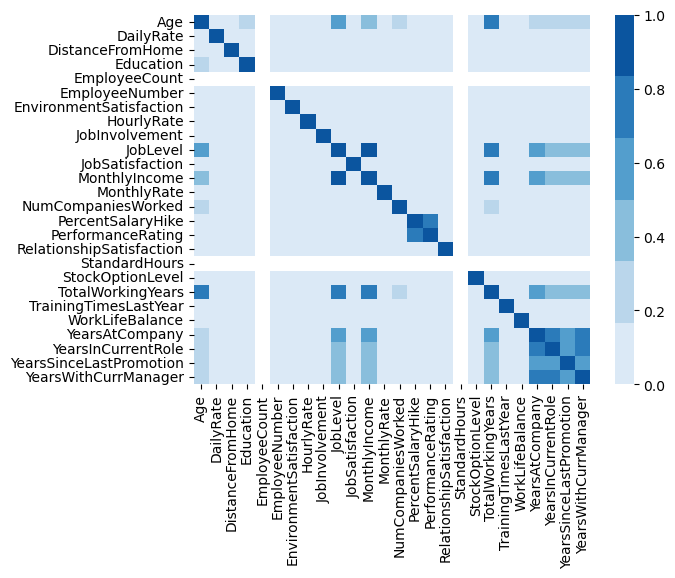

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
dataset = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
corr = dataset.corr()# plot the heatmap
sns.heatmap(corr,vmin=0,vmax=1, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette("Blues"))

### My first question revolves around how worklife balance relates to job involvement. As we look at the data it seems that the vast majority of people had a worklife balance of 3/4 and job involvement of 3/4. Something interesting that I found was that very few people had worklife balance and jobinvolvement at a 4/4.

<AxesSubplot:xlabel='count', ylabel='WorkLifeBalance'>

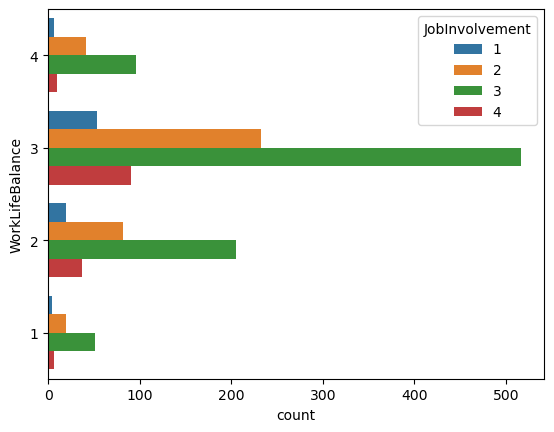

In [3]:
data_order=[4,3,2,1]
sns.countplot(data=dataset,order=data_order, y='WorkLifeBalance', hue='JobInvolvement')


### Going back to the heatmap I saw some things that seemed very intuitive like how age strongly correlated to working years. And how job level correlated to montly income. The more interesting thing to me was the fact that variables like Job satisfaction had almost no correlation to monthly rate.

<AxesSubplot:xlabel='count', ylabel='JobSatisfaction'>

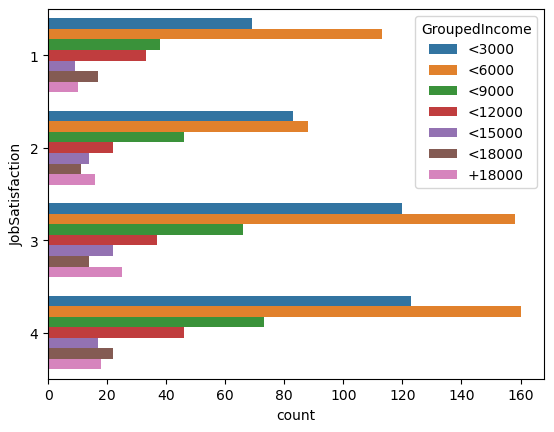

In [12]:
dataset["GroupedIncome"]= np.nan
conditions = [
    (dataset["MonthlyIncome"] <= 3000),
    (dataset["MonthlyIncome"] > 3000) & (dataset["MonthlyIncome"] <= 6000),
    (dataset["MonthlyIncome"] > 6000) & (dataset["MonthlyIncome"] <= 9000),
    (dataset["MonthlyIncome"] > 9000) & (dataset["MonthlyIncome"] <= 12000),
    (dataset["MonthlyIncome"] > 12000) & (dataset["MonthlyIncome"] <= 15000),
    (dataset["MonthlyIncome"] > 15000) & (dataset["MonthlyIncome"] <= 18000),
    (dataset["MonthlyIncome"] > 18000)
    ]
values=["<3000","<6000","<9000","<12000","<15000","<18000","+18000"]
dataset["GroupedIncome"]= np.select(conditions,values)
sns.countplot(data=dataset, y='JobSatisfaction', hue='GroupedIncome',hue_order=values)
#sns.barplot(dataset,x="MonthlyIncome",y="JobInvolvement")

### Wow, that is a surprise to me, it would seem as though monthly income plays a very little in Job Satisfaction. It seems like the number of people that have high income have varying levels of Job Satisfaction.

### The Last question I had revolved around job involvement impacted enviromental satisfaction. Would lower levels of enviromental satisfaction result in higher levels of job involvement? Or maybe higher levels of enviromental satisfaction would cause higher levels of job involvement.

59%


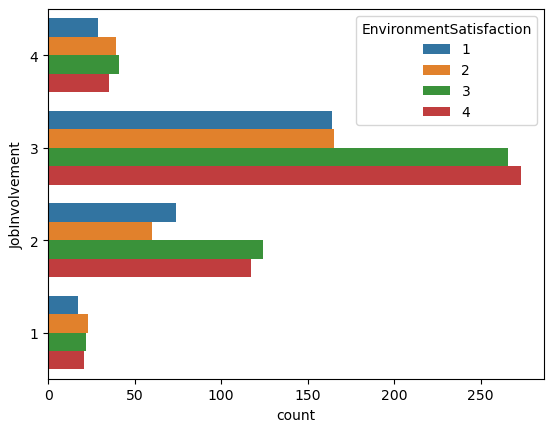

In [31]:
sns.countplot(data=dataset,order=data_order, y='JobInvolvement', hue='EnvironmentSatisfaction')
ji1=dataset["JobInvolvement"].value_counts()[1]
ji2=dataset["JobInvolvement"].value_counts()[2]
ji3=dataset["JobInvolvement"].value_counts()[3]
ji4=dataset["JobInvolvement"].value_counts()[4]
print(str(round(ji3/(ji1+ji2+ji3+ji4)*100))+"%")


### It turns out that 59% of people in this dataset have a job involvement of 3 and within that most people had an environment satisfaction that was a 3 or 4/4. Very few people had a a job involvement at a 4/4.